In [1]:
import os
import numpy as np
import girder_client
import matplotlib.pyplot as plt

import ultrasound_batch_generator as generator

Using TensorFlow backend.


In [12]:
girder_api_url = "https://pocus.cs.queensu.ca/api/v1"
ultrasound_gid = "5da9e5c0d9e6a3be02d012b4"
ultrasound_filename = "q000_ultrasound.npy"
segmentation_gid = "5da9e5c8d9e6a3be02d012cc"
segmentation_filename = "q000_segmentation.npy"

local_data_folder = r"d:\Data\Test"
ultrasound_size = 128
batch_size = 24
num_show = 4
max_shift_factor=0.1

In [13]:
gclient = girder_client.GirderClient(apiUrl=girder_api_url)
ultrasound_fullname = os.path.join(local_data_folder, ultrasound_filename)
gclient.downloadFile(ultrasound_gid, ultrasound_fullname)
segmentation_fullname = os.path.join(local_data_folder, segmentation_filename)
gclient.downloadFile(segmentation_gid, segmentation_fullname)

In [14]:
ultrasound_array = np.load(ultrasound_fullname)
segmentation_array = np.load(segmentation_fullname)

In [15]:
training_generator = generator.UltrasoundSegmentationBatchGenerator(
    ultrasound_array,
    segmentation_array[:, :, :, 0],
    batch_size,
    (ultrasound_size, ultrasound_size),
    max_shift_factor=max_shift_factor
)

Total number of batches: 21


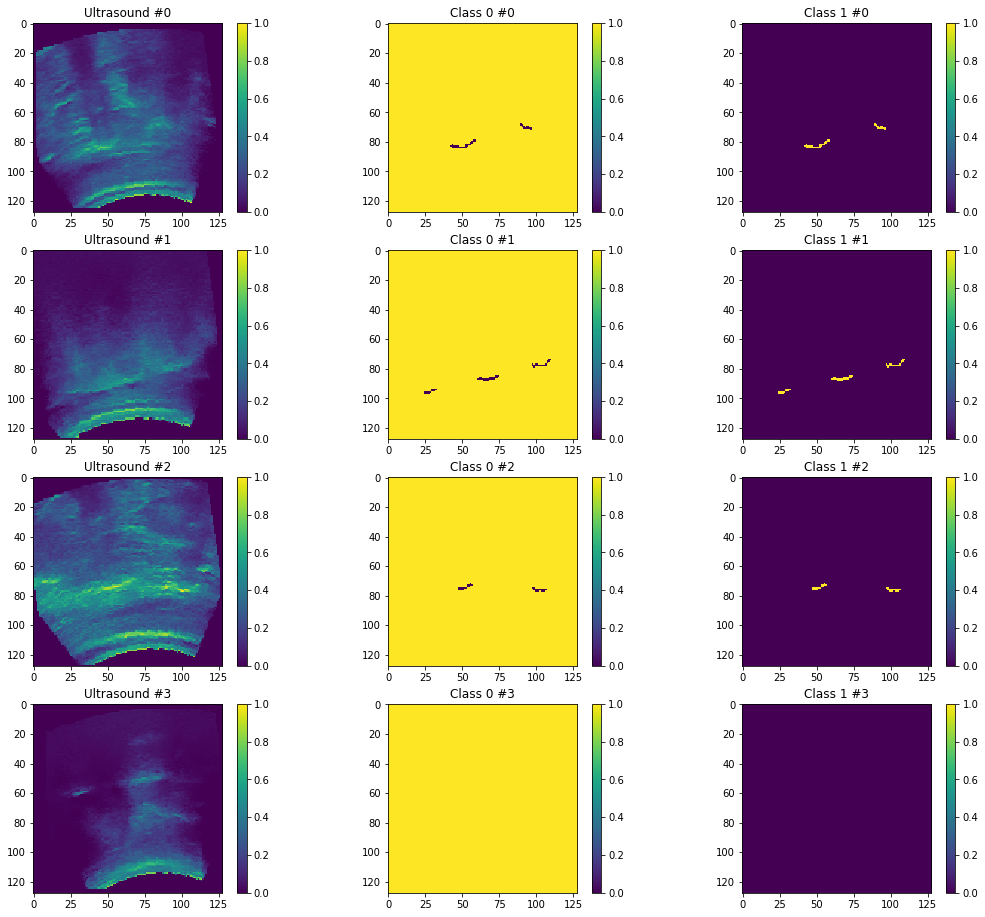

In [16]:
num_batches = training_generator.__len__()
print("Total number of batches: {}".format(num_batches))
batch_index = np.random.randint(num_batches)


bx, by = training_generator.__getitem__(batch_index)

i = np.random.randint(batch_size)

fig = plt.figure(figsize=(18,4*num_show))
for i in range(num_show):
    a1 = fig.add_subplot(num_show,3,i*3+1)
    img1 = a1.imshow(bx[i, :, :, 0], vmin=0.0, vmax=1.0)
    a1.set_title("Ultrasound #{}".format(i))
    c = fig.colorbar(img1)
    a2 = fig.add_subplot(num_show,3,i*3+2)
    img2 = a2.imshow(by[i, :, :, 0], vmin=0.0, vmax=1.0)
    a2.set_title("Class 0 #{}".format(i))
    c = fig.colorbar(img2)
    a3 = fig.add_subplot(num_show,3,i*3+3)
    img3 = a3.imshow(by[i, :, :, 1], vmin=0.0, vmax=1.0)
    a3.set_title("Class 1 #{}".format(i))
    c = fig.colorbar(img3)